In [116]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
import matplotlib.pyplot as plt

In [117]:
df = pd.read_csv("House Price Prediction Dataset.csv")

In [118]:
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [119]:
df = df.drop("Id", axis=1)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Area       2000 non-null   int64 
 1   Bedrooms   2000 non-null   int64 
 2   Bathrooms  2000 non-null   int64 
 3   Floors     2000 non-null   int64 
 4   YearBuilt  2000 non-null   int64 
 5   Location   2000 non-null   object
 6   Condition  2000 non-null   object
 7   Garage     2000 non-null   object
 8   Price      2000 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 140.8+ KB


/var/folders/q3/1c91cqz52t9f43nvh74rn2zr0000gn/T/ipykernel_22567/3825729699.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Location", y="Price", data=df, palette="husl")


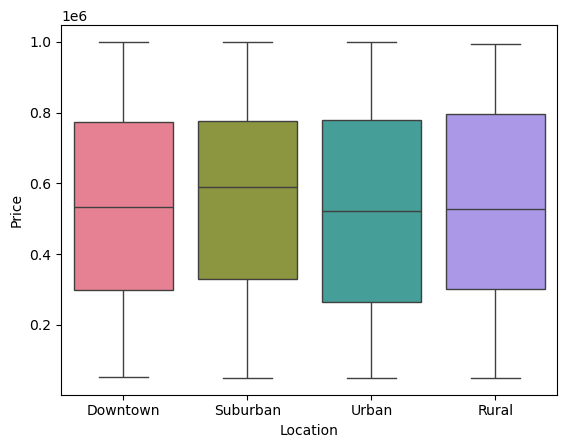

In [121]:
sns.boxplot(x="Location", y="Price", data=df, palette="husl")
plt.show()

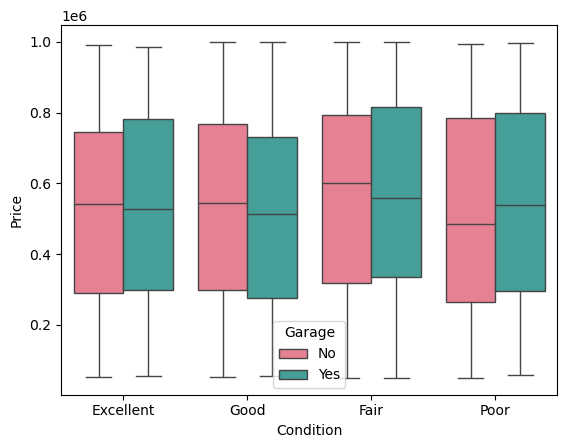

In [122]:
sns.boxplot(x="Condition", y="Price", data=df, hue="Garage", palette="husl")
plt.show()

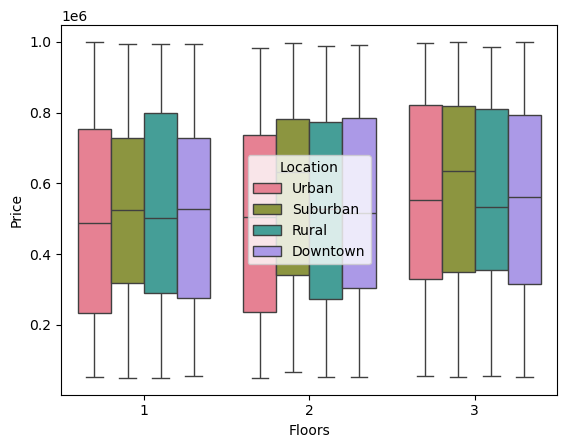

In [123]:
sns.boxplot(x="Floors", y="Price", data=df, hue="Location", palette="husl")
plt.show()

<Axes: xlabel='Bathrooms', ylabel='Price'>

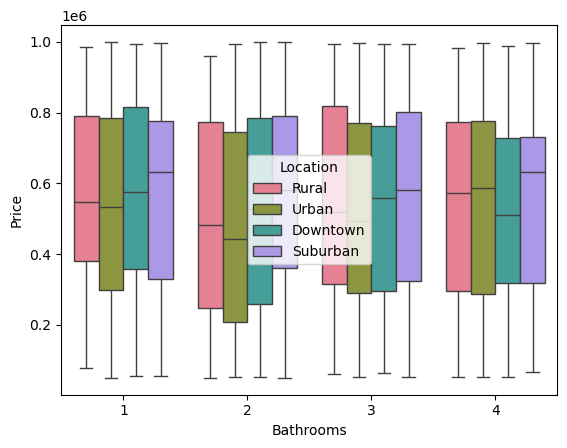

In [124]:
sns.boxplot(x="Bathrooms", y="Price", data=df, hue="Location", palette="husl")


<Axes: xlabel='Bedrooms', ylabel='Price'>

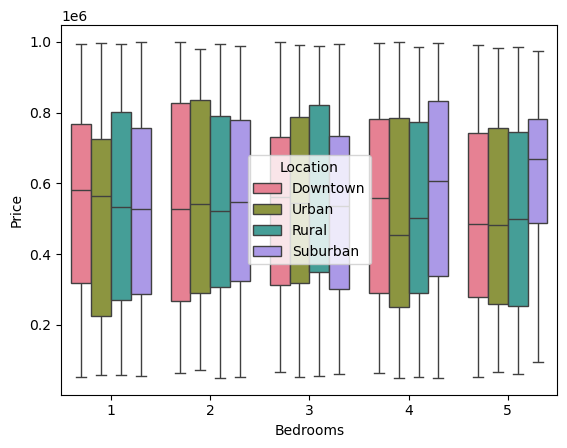

In [125]:
sns.boxplot(x="Bedrooms", y="Price", data=df, hue="Location", palette="husl")

In [126]:
numeric_features = ['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Price']
categorical_features = ['Location', 'Condition', 'Garage']

In [127]:
scaler = MinMaxScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])


encoder = OneHotEncoder(handle_unknown='ignore')
encoded_categorical_data = encoder.fit_transform(df[categorical_features]).toarray()
encoded_df = pd.DataFrame(encoded_categorical_data, columns=encoder.get_feature_names_out())
data = pd.concat([df[numeric_features], encoded_df], axis=1)

In [128]:
X = data.drop('Price', axis=1)
y = data['Price']

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [130]:

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.08683385536793135
